## Exercise 1

In [1]:
from skimage import color, io, measure, img_as_ubyte, exposure
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [2]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "vertebra.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

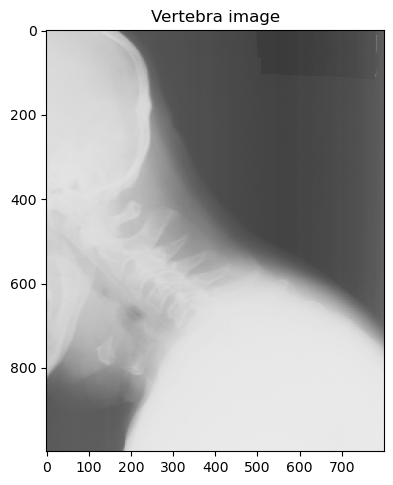

In [3]:
io.imshow(im_org)
plt.title('Vertebra image')
io.show()

## Exercise 2

In [4]:
np.min(im_org)

57

In [5]:
np.max(im_org)

235

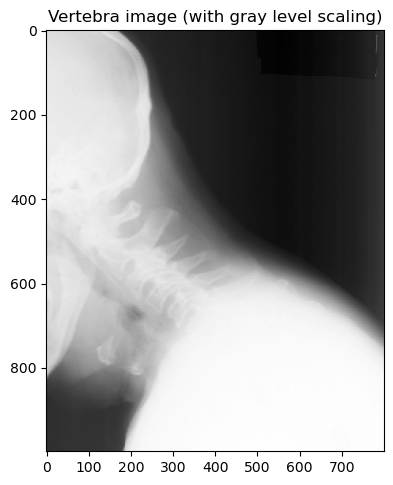

In [6]:
io.imshow(im_org, vmin=57, vmax=235)
plt.title('Vertebra image (with gray level scaling)')
io.show()

## Exercise 3

In [7]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

In [8]:
float_img = img_as_float(im_org)

In [9]:
np.min(float_img)

0.22352941176470587

In [10]:
np.max(float_img)

0.9215686274509803

## Exercise 4

In [11]:
ubyte_img = img_as_ubyte(float_img)

In [12]:
np.min(ubyte_img)

57

In [13]:
np.max(ubyte_img)

235

## Exercise 5

In [14]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    img_out = (max_desired - min_desired) / (max_val - min_val) * (img_float - min_val) + min_desired

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

## Exercise 6

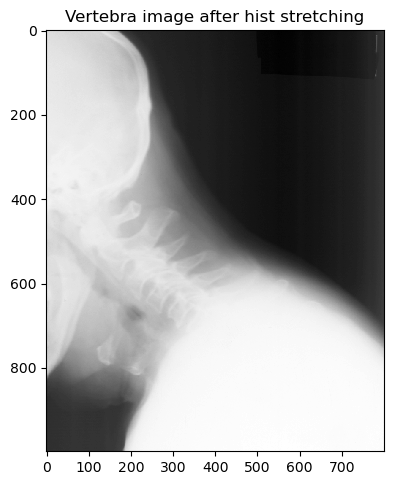

In [15]:
stretched_img = histogram_stretch(im_org)
io.imshow(stretched_img)
plt.title('Vertebra image after hist stretching')
io.show()

## Exercise 7

In [16]:
def gamma_map(img, gamma):
    float_img = img_as_float(img)
    gamma_map = np.power(float_img, gamma)
    
    return gamma_map

## Exercise 8

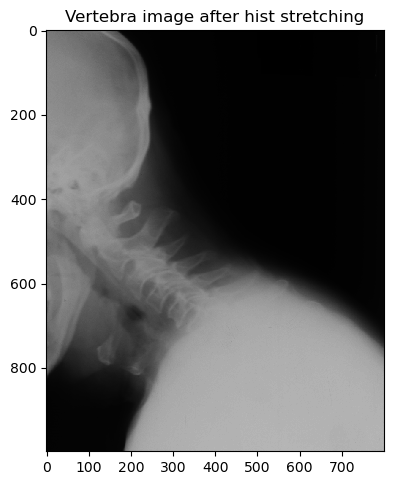

In [17]:
gamma_mapped_img = gamma_map(im_org, 4)
io.imshow(gamma_mapped_img)
plt.title('Vertebra image after hist stretching')
io.show()

## Exercise 9

In [18]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    mask = img_in > thres
    return img_as_ubyte(mask)

## Exercise 10

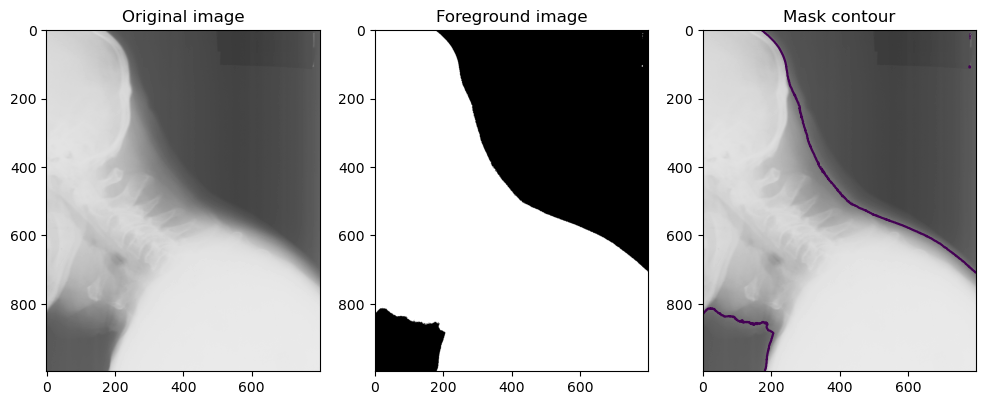

In [19]:
im_thres = threshold_image(im_org, thres = 115)

fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(im_thres, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Foreground image')
ax[2].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].contour(im_thres, [254, 256])
ax[2].set_title('Mask contour')
plt.show()

In [20]:
from skimage.filters import threshold_otsu

## Exercise 11

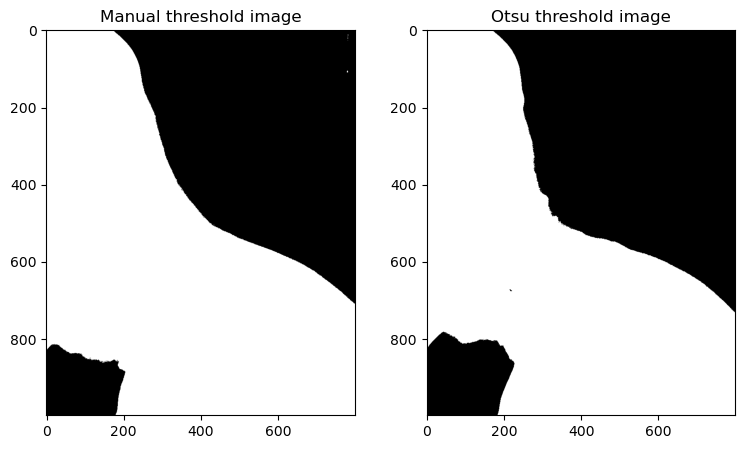

In [21]:
otsu_threshold = threshold_otsu(im_org)
otsu_img = threshold_image(im_org, otsu_threshold)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (9, 5))
ax[0].imshow(im_thres, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Manual threshold image')
ax[1].imshow(otsu_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Otsu threshold image')
plt.show()

## Exercise 12

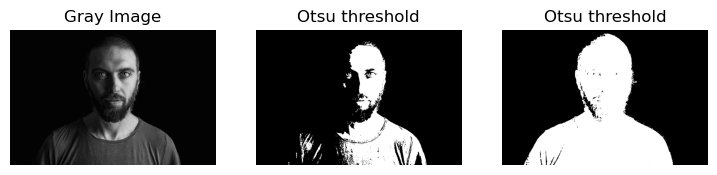

In [22]:
im_org = io.imread(in_dir + 'dark_background.png')
from skimage.color import rgb2gray

gray_img = rgb2gray(im_org)
gray_img = img_as_ubyte(gray_img)

otsu_img = threshold_image(gray_img, threshold_otsu(gray_img))
manual_thres_img = threshold_image(gray_img, 5)

fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (9, 5))

ax[0].imshow(gray_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Gray Image')
ax[0].axis('off')
ax[1].imshow(otsu_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Otsu threshold')
ax[1].axis('off')
ax[2].imshow(manual_thres_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].set_title('Otsu threshold')
ax[2].axis('off')
plt.show()

## Exercise 13

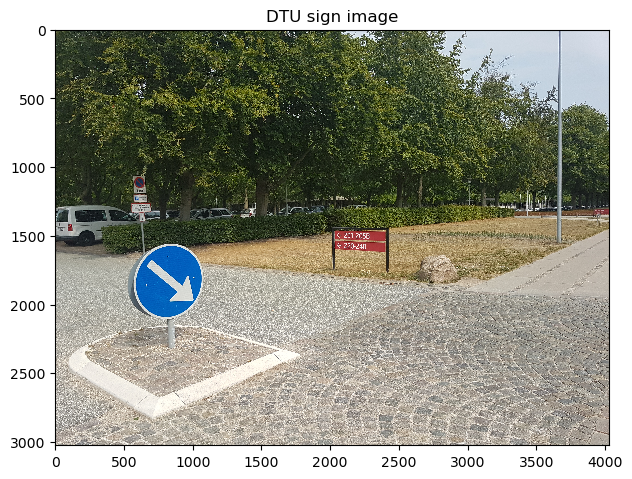

In [23]:
im_org = io.imread(in_dir + 'DTUSigns2.jpg')
io.imshow(im_org)
plt.title('DTU sign image')
io.show()

In [24]:
def detect_dtu_signs(img_in, sign):
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    if sign == 'blue':
        segm = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    if sign == 'red':
        segm = (r_comp > 160) & (r_comp < 180) & (g_comp > 50) & (g_comp < 80) & \
                    (b_comp > 50) & (b_comp < 80)
    return img_as_ubyte(segm)

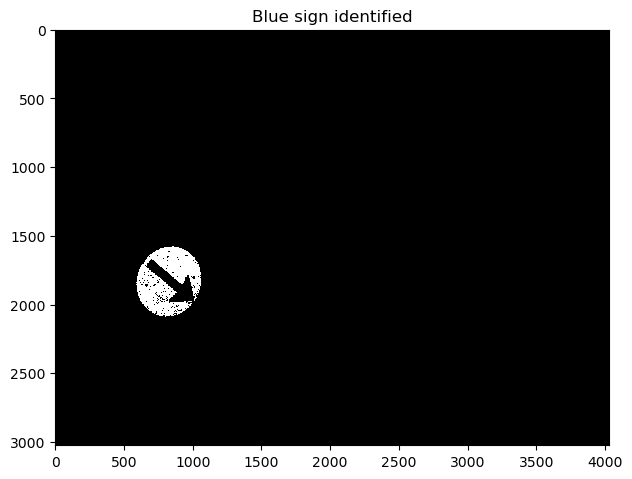

In [25]:
blue_sign_img = detect_dtu_signs(im_org, 'blue')
io.imshow(blue_sign_img)
plt.title('Blue sign identified')
io.show()

## Exercise 14

C:\Users\Christian\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


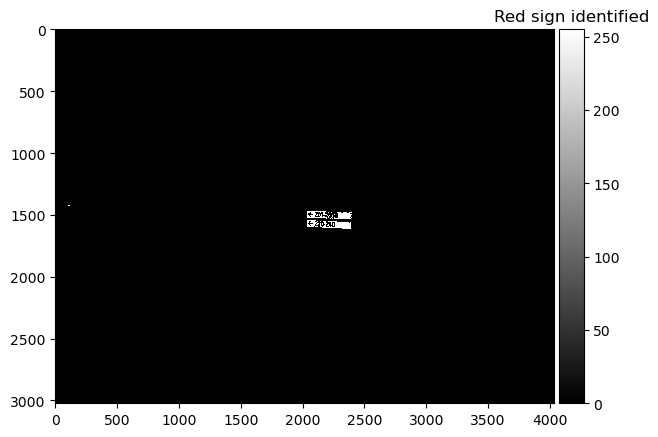

In [26]:
red_sign_img = detect_dtu_signs(im_org, 'red')
io.imshow(red_sign_img, cmap = 'gray')
plt.title('Red sign identified')
io.show()

In [27]:
r = 1530
c = 2250
print('Value of only R channel {}'.format(im_org[ r, c, 0]))
print('Value of only G channel {}'.format(im_org[ r, c, 1]))
print('Value of only B channel {}'.format(im_org[ r, c, 2]))

Value of only R channel 170
Value of only G channel 60
Value of only B channel 63


## Exercise 15

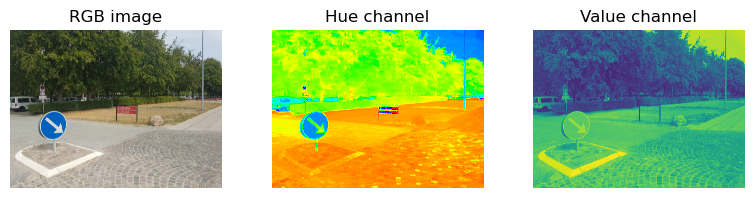

In [28]:
hsv_img = color.rgb2hsv(im_org)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(im_org)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
io.show()

In [29]:
r = 1800
c = 750
print('Value of only R channel {}'.format(hsv_img[ r, c, 0]))
print('Value of only G channel {}'.format(hsv_img[ r, c, 1]))
print('Value of only B channel {}'.format(hsv_img[ r, c, 2]))

Value of only R channel 0.5880681818181818
Value of only G channel 1.0
Value of only B channel 0.6901960784313725


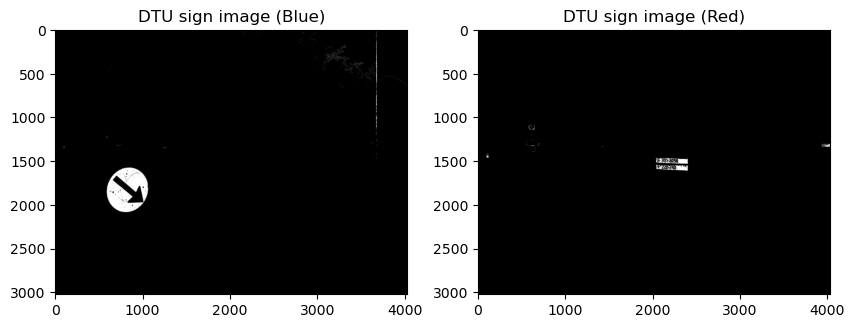

In [30]:
segm_blue = (hue_img < 0.6) & (hue_img  > 0.55) & (value_img < 0.77) & (value_img > 0.70)
segm_red = (hue_img < 1.0) & (hue_img  > 0.99)

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(segm_blue, cmap = 'gray')
ax1.set_title('DTU sign image (Blue)')

ax2.imshow(segm_red, cmap = 'gray')
ax2.set_title('DTU sign image (Red)')
plt.show()

## Exercise 16

In [31]:
!python data/Ex3-VideoPixelWiseOperations.py

Traceback (most recent call last):
  File "C:\Users\Christian\Documents\DTUImageAnalysis\exercises\ex3-PixelwiseOperations\data\Ex3-VideoPixelWiseOperations.py", line 5, in <module>
    import cv2
ImportError: DLL load failed while importing cv2: The specified module could not be found.


In [32]:
!python data/exercise17.py

Traceback (most recent call last):
  File "C:\Users\Christian\Documents\DTUImageAnalysis\exercises\ex3-PixelwiseOperations\data\exercise17.py", line 6, in <module>
    import cv2
ImportError: DLL load failed while importing cv2: The specified module could not be found.


In [33]:
!python data/exercise18.py

Traceback (most recent call last):
  File "C:\Users\Christian\Documents\DTUImageAnalysis\exercises\ex3-PixelwiseOperations\data\exercise18.py", line 5, in <module>
    import cv2
ImportError: DLL load failed while importing cv2: The specified module could not be found.
